In [1]:
from operator import sub

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error
from matplotlib import pyplot as plt
from seaborn import pairplot, heatmap

## Iris Classification

In [2]:
# Iris dataset
iris = load_iris()

In [3]:
# Column names for the variable X
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X['target'] = y

C:\Users\JR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\JR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


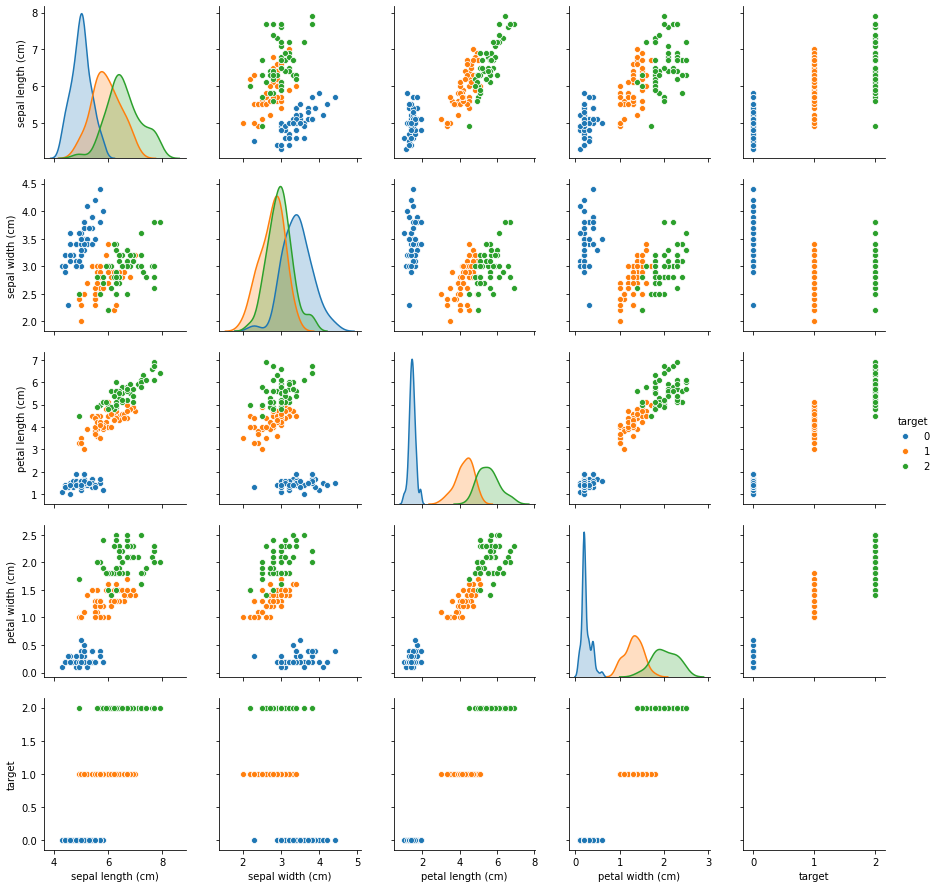

In [5]:
# Quick look at the ground truth 2d plots
pairplot(X, hue='target');

### Train-Test-Split Using Naive Bayes For Comparisons

In [6]:
X.drop('target', axis=1, inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
iris_preds = gnb.predict(X_test)

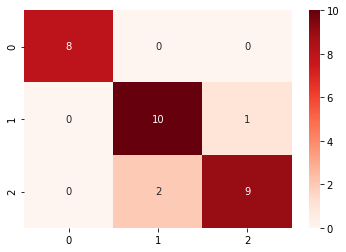

In [9]:
iris_conf = confusion_matrix(y_test, iris_preds)
heatmap(iris_conf, cmap='Reds', fmt='d', annot=True);

In [10]:
average = 'macro'
print(gnb.score(X_test, y_test))
print(round(precision_score(y_test, iris_preds, average=average),3))
print(round(recall_score(y_test, iris_preds, average=average),3))

0.9
0.911
0.909


### K Nearest Neighbors Cross Validation

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(np.mean(scores))

0.9733333333333334


In [12]:
k_scores = list()
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(np.mean(scores))

In [13]:
print(f'KNN Value: {k_scores.index(max(k_scores))+1}')
print(f'KNN Accuracy: {round(max(k_scores), 3)}')

KNN Value: 6
KNN Accuracy: 0.98


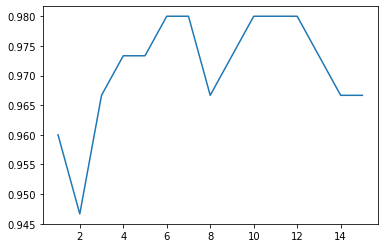

In [14]:
plt.plot(range(1, 16), k_scores);

## Iris Regression For Petal Width

### Train Test Score Using Linear Regresssion For Comparison

In [15]:
lr = LinearRegression()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
X = iris.drop('petal width (cm)', axis=1)
y = iris['petal width (cm)']

Since all the measurements are in cm, there isn't any reason to standardized the measurements.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
lr.fit(X_train, y_train)
iris_preds = lr.predict(X_test)

In [17]:
# Coefficients and intercept of the linear model.
print(lr.coef_)
print(lr.intercept_)

[-0.19219601  0.19262539  0.51766848]
-0.20842766437998694


In [18]:
print(round(lr.score(X_test, y_test), 3))
print(round(mean_squared_error(y_test, iris_preds), 3))

0.915
0.045


### Average Of Cross Validated Scores For Linear Regression

In [19]:
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
print(round(np.mean(-scores), 10))

0.039749045


### K Nearest Neighbors Regression Cross Validation

In [20]:
knn = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
print(round(np.mean(-scores), 3))

0.041


In [21]:
k_scores = list()
for k in range(1, 16):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    k_scores.append(np.mean(-scores))

In [22]:
print(f'KNN Value: {k_scores.index(min(k_scores))+1}')
print(f'KNN MSE: {round(min(k_scores), 3)}')

KNN Value: 6
KNN MSE: 0.039


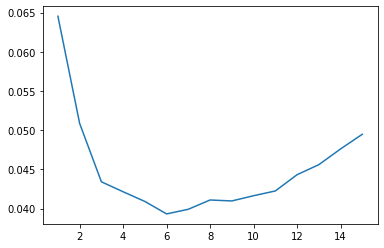

In [23]:
# Plotting KNN value against the MSE
plt.plot(range(1, 16), k_scores);

## Iris Clustering (Do not use iris.target)

In [24]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
km = KMeans(n_clusters=3, random_state=5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [26]:
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
print(km.n_iter_)
print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(y)

6
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
78.85144142614601
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
# Relabeling so that a comparison can be made
km.relabels_ = np.choose(km.labels_,[1, 0, 2]).astype(np.int64)
print(km.relabels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


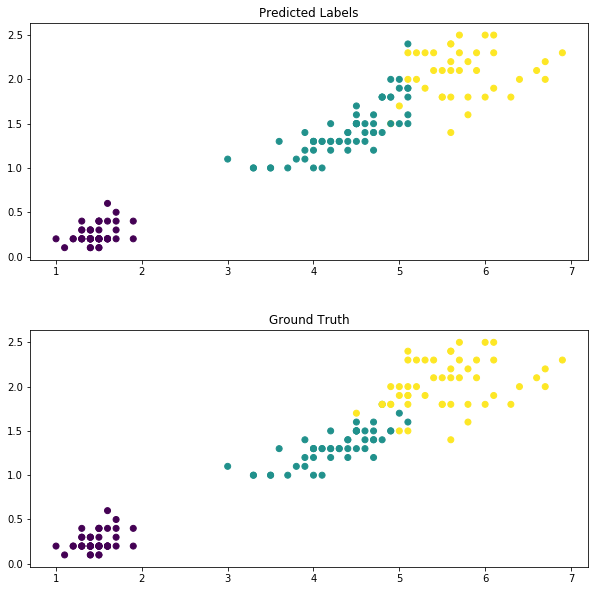

In [29]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2,1,1)
plt.title('Predicted Labels')
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=km.relabels_);


plt.subplot(2,1,2)
plt.title('Ground Truth')
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y);

In [30]:
print(round(accuracy_score(y, km.relabels_), 3))
print(round(precision_score(y, km.relabels_, average=average), 3))
print(round(recall_score(y, km.relabels_, average=average), 3))

0.893
0.907
0.893


In [31]:
sse = list()
for k in range(1, 12):
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(X)
    sse.append(km.inertia_)

In [32]:
list(map(sub, sse[:-1], sse[1:]))

[529.0226482396421,
 73.4965103342119,
 21.595432110427858,
 10.809827264436102,
 7.406194805194801,
 4.509015384615381,
 4.466378787878789,
 1.8612873700087356,
 1.9513799529429185,
 1.654320487483531]

#### The Elbow Method

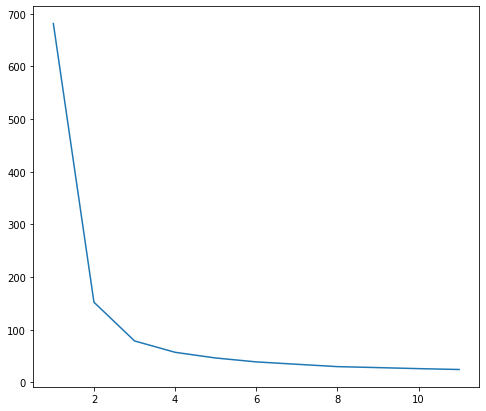

In [33]:
# Plotting inertia again the sum of squared errors
plt.figure(figsize=(8,7))
plt.plot(range(1, 12), sse);

# Interesting; the iris dataset is well known and therefore most know to choose a k cluster value of 3.
# However, the first major kink in the inertia plot indicates that 2 would be a good guess if the targets were not known.